<a href="https://colab.research.google.com/github/Anu-jo/week3/blob/main/SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
import sklearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df=pd.read_csv('Dry_Bean_Dataset.csv')
#data encoding
from sklearn.preprocessing import OneHotEncoder
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df[["Class"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
df= df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))
y = df['Class']#dependent variable
X = df.drop(['Class'], axis = 1)#independent variable
smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))
#data standardization
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
 # standardization
X_std = object.fit_transform(x_smote)
print(X_std)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


Original dataset shape Counter({'DERMASON': 3546, 'SIRA': 2636, 'SEKER': 2027, 'HOROZ': 1928, 'CALI': 1630, 'BARBUNYA': 1322, 'BOMBAY': 522})
Resample dataset shape Counter({'SEKER': 3546, 'BARBUNYA': 3546, 'BOMBAY': 3546, 'CALI': 3546, 'HOROZ': 3546, 'SIRA': 3546, 'DERMASON': 3546})
[[-0.90001049 -1.21834013 -1.35253199 ... -0.40824829  2.44948974
  -0.40824829]
 [-0.89265076 -1.12460032 -1.41939031 ... -0.40824829  2.44948974
  -0.40824829]
 [-0.87862602 -1.17162067 -1.31192761 ... -0.40824829  2.44948974
  -0.40824829]
 ...
 [-0.50972772 -0.56786924 -0.64266972 ... -0.40824829 -0.40824829
   2.44948974]
 [-0.40310933 -0.38519158 -0.31307664 ... -0.40824829 -0.40824829
   2.44948974]
 [-0.62353215 -0.75241218 -0.73857273 ... -0.40824829 -0.40824829
   2.44948974]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


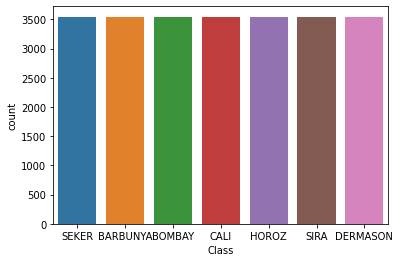

In [ ]:
g = sns.countplot(df['Class'])
g_smote = sns.countplot(y_smote)
g.set_xticklabels(['SEKER','BARBUNYA','BOMBAY','CALI','HOROZ','SIRA','DERMASON'])
plt.show()

In [ ]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)
X_lda

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[ 2.64931865, -2.28669012,  2.17033366, -2.72244854, -1.03923035,
        -2.3974093 ],
       [ 1.33428765, -1.05963799,  3.68575463, -1.69811644, -1.75172933,
        -1.056052  ],
       [ 2.66334205, -2.21976529,  2.36580382, -2.5404499 , -0.76526182,
        -2.02995891],
       ...,
       [ 2.09475456, -1.2618103 , -0.5082351 ,  0.61563482, -0.28994781,
         1.30430414],
       [ 1.99774574, -1.03158541, -0.79092497,  0.72565945, -0.26821312,
         1.4137352 ],
       [ 1.76692639, -0.15962229, -1.20314046,  0.74654948, -0.15932636,
         1.22705777]])

[ 41.46672698  66.41075811  73.88825303  79.85545214  85.26638076
  90.42630943  94.64530201  97.6349461   98.48046118  99.16027205
  99.47910892  99.71536277  99.88532753  99.96858438  99.99286342
  99.99656618  99.99884924  99.99952576  99.99995574  99.9999883
  99.99999466 100.         100.        ]


Text(0, 0.5, 'Cumulative Explained variance(%)')

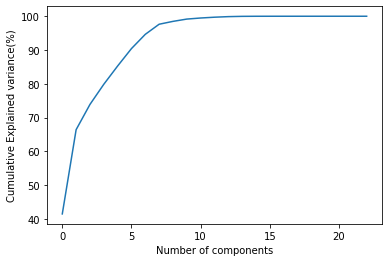

In [ ]:
#dimensionality reduction using PCA
from sklearn.model_selection import train_test_split# model for splitting the data
# we split 80% of the data for model training and 20% accuracy model testing
XTrain, XTest, YTrain, YTest = train_test_split(X_std, y_smote, test_size = 0.2, random_state =100)
# Scalling the features
stndS = StandardScaler()
XTrain = stndS.fit_transform(XTrain)
XTest = stndS.transform(XTest)
#PCA calculation
pca=PCA()
XTrain_pca=pca.fit_transform(XTrain)
XTest_pca=pca.transform(XTest)
#print(pca.explained_variance_ratio_*100)
cum_sum_pca=np.cumsum(pca.explained_variance_ratio_*100)
print(cum_sum_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance(%)')


Text(0, 0.5, 'Cumulative Explained variance(%)')

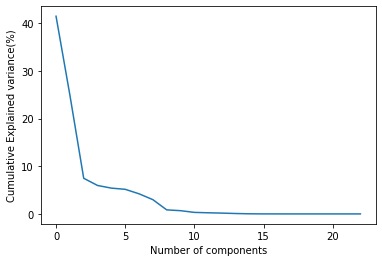

In [ ]:
plt.plot(pca.explained_variance_ratio_*100)
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance(%)')

In [ ]:
#taking 95% of varaiance contributed components
pca_95=PCA(n_components=0.95)
X_pca_95=pca_95.fit_transform(X_std)
print(X_pca_95.shape)
#creating new dataset that is dimensionally reduced
df_new=pd.DataFrame(X_pca_95,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
df_new['Class']=y_smote
print(df_new.head())
#df_new.to_csv('Drybeans_95.csv',index=False)
y_new = df_new['Class']#dependent variable
X_new = df_new.drop(['Class'], axis = 1)#independent variable



(24822, 8)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -5.444867 -2.719322  0.332838 -0.069033  1.751435  0.274256  0.514566   
1 -5.872886 -3.648355  1.600252 -0.016061  1.930429  0.445694  1.085560   
2 -5.252681 -2.686870  0.242213 -0.082863  1.686522  0.217962  0.236777   
3 -4.912997 -2.667781  2.252766  0.717571  1.831457  0.627602  2.135911   
4 -6.628790 -4.811348  0.626404 -0.109386  2.133337  0.356207  0.780760   

        PC8  Class  
0  0.068769  SEKER  
1  0.555905  SEKER  
2  0.302607  SEKER  
3  0.990780  SEKER  
4 -0.025097  SEKER  


In [ ]:
from sklearn.preprocessing import OneHotEncoder
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df_new[["Class"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
df_new = df_new.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))

In [ ]:
# standardization
X_std = object.fit_transform(X_new)
print(X_std)

[[-1.76515090e+00 -1.13374564e+00  2.53624666e-01 ...  2.51461671e-01
   5.22047321e-01  8.28412971e-02]
 [-1.90390898e+00 -1.52108028e+00  1.21940211e+00 ...  4.08651318e-01
   1.10134329e+00  6.69662699e-01]
 [-1.70284682e+00 -1.12021594e+00  1.84567833e-01 ...  1.99846295e-01
   2.40219676e-01  3.64530379e-01]
 ...
 [-7.07890449e-01 -2.73875047e-01 -4.91535674e-01 ... -2.16365398e+00
   4.23845776e-01  1.74576791e-02]
 [-2.75298693e-01  3.55212814e-01 -6.79768963e-01 ... -2.18560865e+00
   3.54831414e-01 -4.01178869e-01]
 [-7.64784320e-01 -1.64957302e-03 -7.45797513e-01 ... -2.15429672e+00
   4.71505274e-01 -3.78838956e-01]]


In [ ]:
from sklearn.model_selection import train_test_split# model for splitting the data
# we split 80% of the data for model training and 20% accuracy model testing
XTrain, XTest, YTrain, YTest = train_test_split(X_std, y_new, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Calling the Class
naive_bayes = GaussianNB()

#Fitting the data to the classifier
naive_bayes.fit(XTrain , YTrain)

#Predict on test data
y_predicted = naive_bayes.predict(XTest)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
print('Accuracy score for full data set:')
accuracy_score=accuracy_score(y_predicted , YTest)
accuracy_score


Accuracy score for full data set:


0.998992950654582

In [ ]:
confusion_matrix(YTest, y_predicted)


array([[743,   0,   1,   0,   0,   0,   0],
       [  0, 710,   0,   0,   0,   0,   0],
       [  0,   0, 654,   0,   1,   0,   0],
       [  0,   0,   0, 690,   2,   0,   0],
       [  0,   0,   0,   0, 743,   0,   0],
       [  0,   0,   0,   0,   1, 665,   0],
       [  0,   0,   0,   0,   0,   0, 755]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


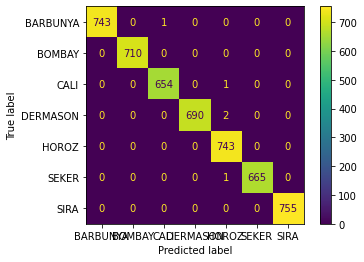

In [ ]:
plot_confusion_matrix(naive_bayes,XTest,YTest)

In [ ]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="entropy", random_state=42,max_depth=3, min_samples_leaf=7)
clf_model.fit(XTrain,YTrain)
y_predict = clf_model.predict(XTest)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
accuracy_score(YTest,y_predict)


0.9824773413897281

In [ ]:
confusion_matrix(YTest,y_predict)

array([[698,  46,   0,   0,   0,   0,   0],
       [  9, 693,   2,   0,   6,   0,   0],
       [  0,   0, 655,   0,   0,   0,   0],
       [  0,   0,   0, 692,   0,   0,   0],
       [  0,   0,  19,   0, 724,   0,   0],
       [  0,   0,   0,   0,   5, 661,   0],
       [  0,   0,   0,   0,   0,   0, 755]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


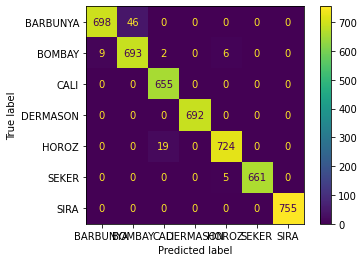

In [ ]:
plot_confusion_matrix(clf_model,XTest,YTest)

In [ ]:
#SVM classifier
from sklearn.svm import SVC
clf = SVC(kernel='rbf', gamma=0.01, C=1000)
clf.fit(XTrain, YTrain)
predictions = clf.predict(XTest)
accuracy_score(YTest, predictions)

1.0

In [ ]:
confusion_matrix(YTest,predictions)

array([[744,   0,   0,   0,   0,   0,   0],
       [  0, 710,   0,   0,   0,   0,   0],
       [  0,   0, 655,   0,   0,   0,   0],
       [  0,   0,   0, 692,   0,   0,   0],
       [  0,   0,   0,   0, 743,   0,   0],
       [  0,   0,   0,   0,   0, 666,   0],
       [  0,   0,   0,   0,   0,   0, 755]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


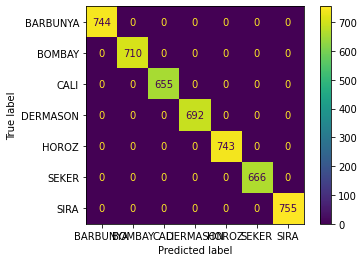

In [ ]:
plot_confusion_matrix(clf,XTest,YTest)